# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [2]:
#A)

# Matriz de transformação
m = np.array([[.5,.5],   # Média
              [-1, 1]])  # Diferença

# Cálculo da média e diferença entre p1 e p2 através de multiplicação matricial
df['média'], df['diferença'] = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

df.style.format(precision=2, decimal=',')

,p1,p2,média,diferença
0,"6,96","7,94","7,45","0,98"
1,"2,86","5,10","3,98","2,24"
2,"2,27","0,97","1,62","-1,29"
3,"5,51","4,47","4,99","-1,04"
4,"7,19","8,94","8,07","1,74"
5,"4,23","3,43","3,83","-0,80"
6,"9,81","9,84","9,82","0,03"
7,"6,85","7,92","7,38","1,07"
8,"4,81","5,70","5,25","0,89"
9,"3,92","5,68","4,80","1,75"


In [3]:
# B)

print("Correlação entre p1 e p2:", df.p1.corr(df.p2))

Correlação entre p1 e p2: 0.8957365818728046


In [4]:
# C)

print("Correlação entre a média e a diferença:", df['média'].corr(df['diferença']))

Correlação entre a média e a diferença: 0.13347385411788837


D)

> Correlação entre os dados das variáveis `p1` e `p2`:
> - A correlação de 0,89 demonstra uma forte correlação entre as notas das colunas `p1` e `p2`, indicando uma forte associação e semelhança entre os dois conjuntos de dados.
>
> Correlação entre os dados transformados (`média` e `diferença`):
> - O valor resultante de 0,13 indica uma correlação baixa entre as variáveis. Isso indica a média não está expressamente relacionada à diferença, porque um aluno pode ter uma média boa porém evolução baixa, e outro aluno pode ter média baixa mas evolução alta.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [5]:
df['soma'] = df.p1 + df.p2  # Cálculo da soma entre p1 e p2

df.style.format(precision=2, decimal=',')

,p1,p2,média,diferença,soma
0,"6,96","7,94","7,45","0,98","14,91"
1,"2,86","5,10","3,98","2,24","7,96"
2,"2,27","0,97","1,62","-1,29","3,24"
3,"5,51","4,47","4,99","-1,04","9,99"
4,"7,19","8,94","8,07","1,74","16,13"
5,"4,23","3,43","3,83","-0,80","7,66"
6,"9,81","9,84","9,82","0,03","19,64"
7,"6,85","7,92","7,38","1,07","14,77"
8,"4,81","5,70","5,25","0,89","10,51"
9,"3,92","5,68","4,80","1,75","9,60"


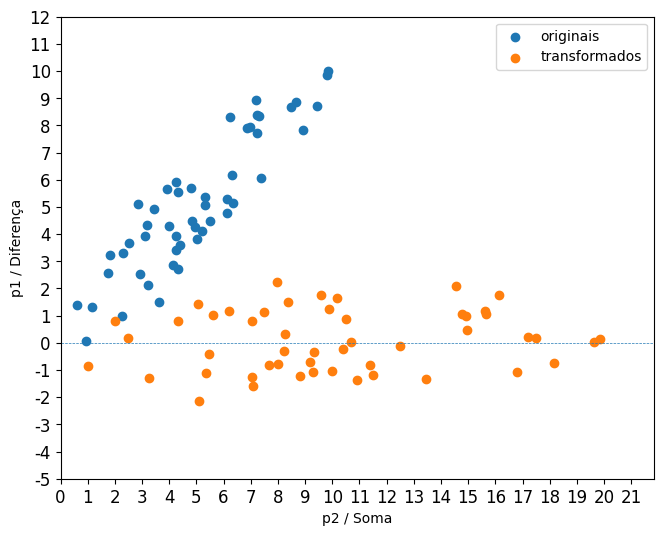

In [9]:
#Definindo figura e configurando eixos
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1,1,1)

xmin = 0
xmax = df['soma'].max()*1.1
ymin = -5
ymax = 12

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

plt.scatter(x = df.p1, y=df.p2, label = 'originais')
plt.scatter(x = df['soma'], y=df['diferença'], label = 'transformados')

ax.set_xlabel('p2 / Soma')  # Legenda do eixo x
ax.set_ylabel('p1 / Diferença')  # Legenda do eixo y
#Legenda
plt.legend()


Podemos observar que a soma das notas não tem muita relação com a diferença obtida entre elas. Tanto evolução de p1 pra p2 quanto regressão da nota, obteve-se tanto somas altas quanto baixas.